In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
msg=pd.read_csv('naive.csv',names=['message','label']) #extract the columns from the csv and title them as message and label
print('The dimensions of the dataset',msg.shape)

The dimensions of the dataset (18, 2)


In [3]:
msg['labelnum']=msg.label.map({'pos':1,'neg':0}) # Convert 'pos' label as 1 and 'neg' label as 0
X=msg.message
y=msg.labelnum

In [4]:
print(X)

0                      I love this sandwich
1                  This is an amazing place
2        I feel very good about these beers
3                      This is my best work
4                      what an awesome view
5             I do not like this restaurant
6                  I am tired of this stuff
7                    I can't deal with this
8                      He is my sworn enemy
9                       My boss is horrible
10                 This is an awesome place
11    I do not like the taste of this juice
12                          I love to dance
13        I am sick and tired of this place
14                     What a great holiday
15           That is a bad locality to stay
16           We will have good fun tomorrow
17         I went to my enemy's house today
Name: message, dtype: object


In [5]:
print(y) #classifications

0     1
1     1
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    1
17    0
Name: labelnum, dtype: int64


In [6]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y) #by default around 27% is test data
print(xtest.shape)
print(xtrain.shape)
print(ytest.shape)
print(ytrain.shape)

(5,)
(13,)
(5,)
(13,)


#### DATA PREPROCESSING - Vectorisation: 
Convert a collection of text documents to a matrix of token counts
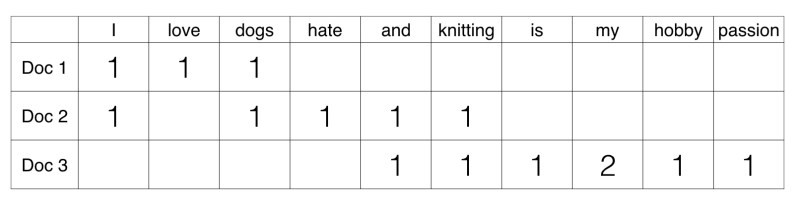

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer() # Constructor returns an object that performs vectorisation
xtrain_dtm=count_vect.fit_transform(xtrain) # object analyses the given data and vectorises it
xtest_dtm=count_vect.transform(xtest) # object attempts to predict the labels for test data

#### MODEL - Naive Bayes
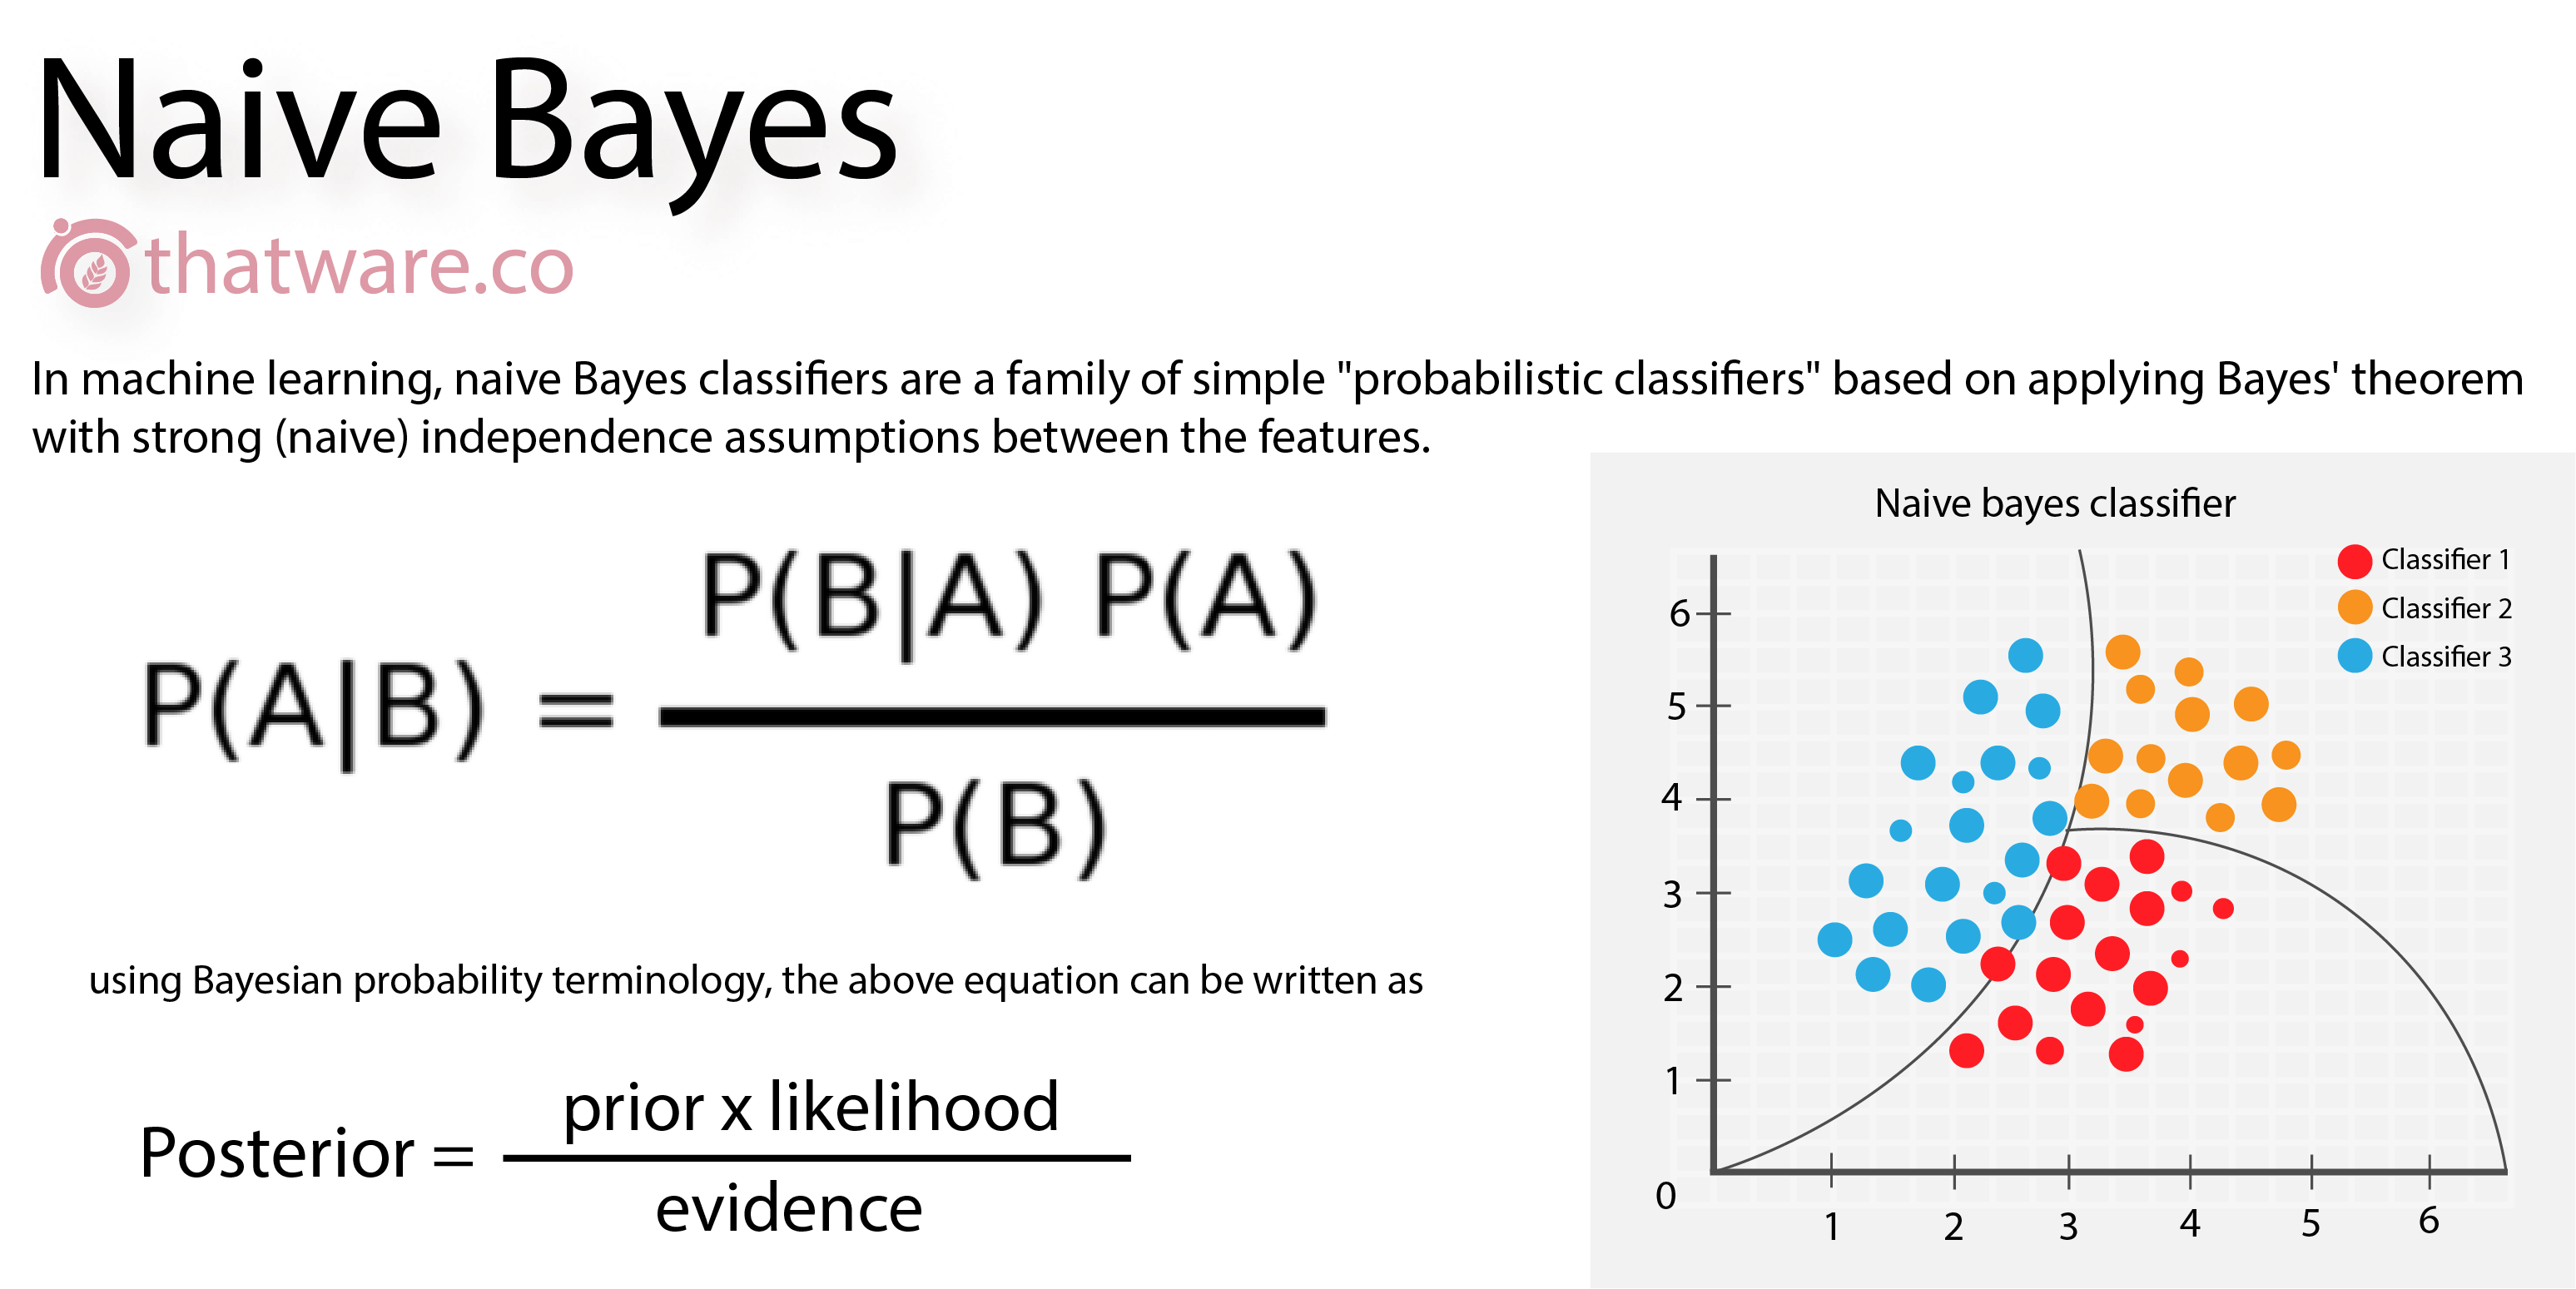
Naive Bayes classifier for multinomial models

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [8]:
from sklearn.naive_bayes import MultinomialNB
n_b = MultinomialNB() # Constructor returns the object that builds a classification model
clf = n_b.fit(xtrain_dtm,ytrain) # The object builds according to the training data fed
predicted = clf.predict(xtest_dtm) # The object predicts the classification for the test data

#### SKLEARN METRICS
The sklearn.metrics module implements several loss, score, and utility functions to measure classification performance. Some metrics might require probability estimates of the positive class, confidence values, or binary decisions values. Most implementations allow each sample to provide a weighted contribution to the overall score, through the sample_weight parameter.
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

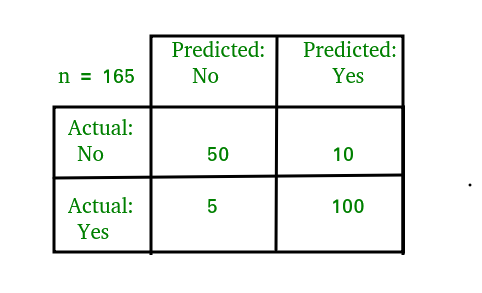 
Confusion Matrix 

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

RECALL , PRECISION , ACCURACY
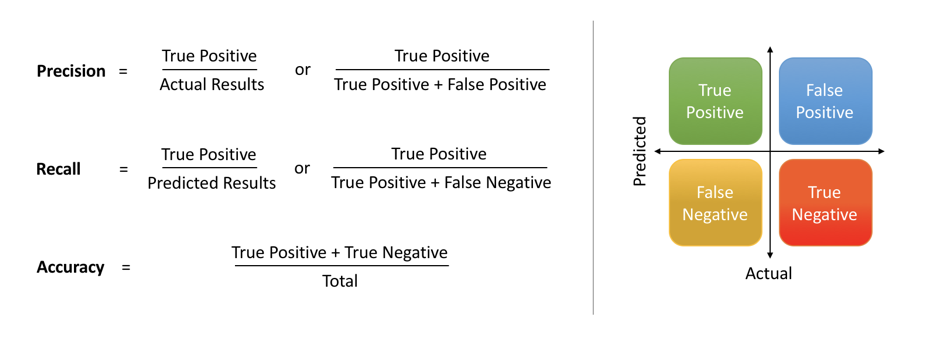

In [9]:
from sklearn import metrics
print('Accuracy metrics')
print('Accuracy of the classifer is',metrics.accuracy_score(ytest,predicted)) #this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true
print('Confusion matrix')
print(metrics.confusion_matrix(ytest,predicted)) # confusion matrix allows easy identification of confusion between classes e.g. one class is commonly mislabeled as the other.
print('Recall and Precison')
print(metrics.recall_score(ytest,predicted))
print(metrics.precision_score(ytest,predicted))

Accuracy metrics
Accuracy of the classifer is 0.8
Confusion matrix
[[2 1]
 [0 2]]
Recall and Precison
1.0
0.6666666666666666
